In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = 'spectrum.txt'
column_names = ["Длина_волны", "Интенсивность"]
df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, names=column_names)


<Axes: xlabel='Длина_волны'>

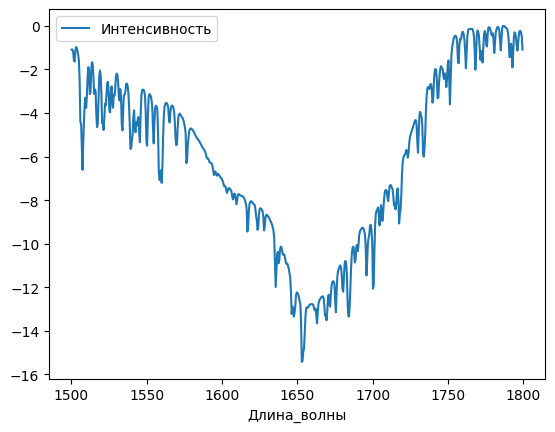

In [12]:
slice_borders = (1500, 1800)
lower_bound, upper_bound = sorted(slice_borders)
        
# Фильтрация DataFrame
filtered_df = df[(df["Длина_волны"] >= lower_bound) & (df["Длина_волны"] <= upper_bound)].copy()

# Вычисление уравнения прямой
start_point = filtered_df.iloc[0]
end_point = filtered_df.iloc[-1]
m = (end_point["Интенсивность"] - start_point["Интенсивность"]) / (end_point["Длина_волны"] - start_point["Длина_волны"])
c = start_point["Интенсивность"] - m * start_point["Длина_волны"]

# Нахождение максимального значения для горизонтальной линии
max_value = filtered_df["Интенсивность"].max()

# Корректировка значений
filtered_df["Интенсивность"] = filtered_df.apply(
    lambda row: row["Интенсивность"] - (m * row["Длина_волны"] + c) + max_value, axis=1)

filtered_df["Интенсивность"] = filtered_df["Интенсивность"] + (100 - filtered_df["Интенсивность"].max())

filtered_df["Интенсивность"] = filtered_df["Интенсивность"] - filtered_df["Интенсивность"].max()
filtered_df.plot("Длина_волны", "Интенсивность")

In [19]:
from scipy import signal
x = filtered_df['Длина_волны']
y = filtered_df['Интенсивность']
Savitzky_df = pd.DataFrame({
         'window_length':[1],'polyorder':[0], 'Savitzky_mode':['nearest']})
Savitzky_df

,window_length,polyorder,Savitzky_mode
0,1,0,nearest


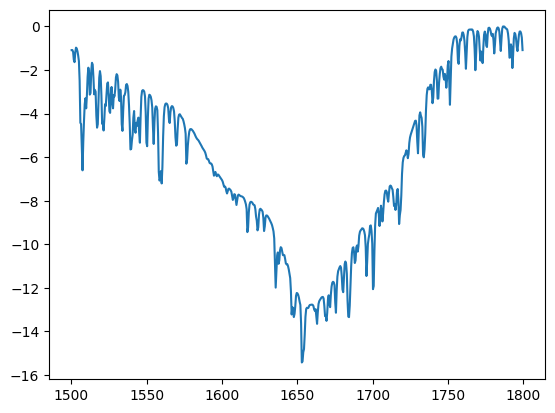

In [20]:
y_smooth = signal.savgol_filter(
            y, 
            window_length=Savitzky_df['window_length'].astype(int).item(),
            polyorder=Savitzky_df['polyorder'].astype(int).item(), 
            mode=Savitzky_df['Savitzky_mode'].astype(str).item())

plt.plot(x, y_smooth)